<a href="https://colab.research.google.com/github/yshun2272/stock-dashboard/blob/main/Winrock.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

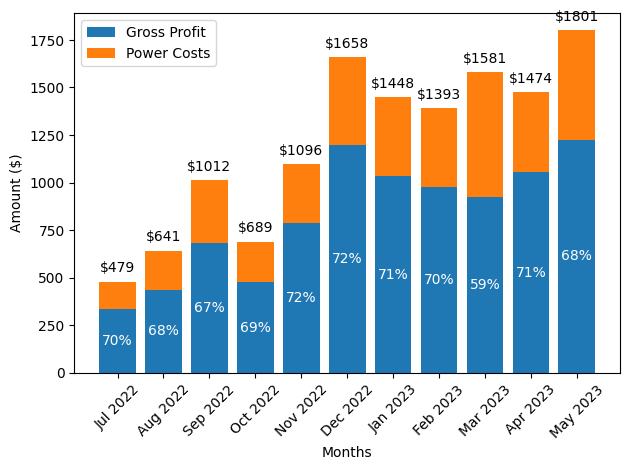

In [ ]:
import matplotlib.pyplot as plt

# Data for three months starting from July 2022
months = ['Jul 2022', 'Aug 2022', 'Sep 2022', 'Oct 2022', 'Nov 2022', 'Dec 2022', 'Jan 2023', 'Feb 2023', 'Mar 2023', 'Apr 2023', 'May 2023']
revenue = [479, 641, 1012, 689, 1096, 1658, 1448, 1393, 1581, 1474, 1801]
power_costs = [142, 206, 331, 215, 308, 459, 415, 419, 655, 421, 577]
gross_profit = [revenue[i] - power_costs[i] for i in range(len(revenue))]
gross_profit_percentage = [round((gross_profit[i] / revenue[i]) * 100) for i in range(len(revenue))]

# Creating the stacked bar chart
plt.bar(months, gross_profit, label='Gross Profit')
plt.bar(months, power_costs, bottom=gross_profit, label='Power Costs')
plt.xlabel('Months')
plt.ylabel('Amount ($)')
plt.legend()

# Adding revenue amounts on top of each stacked bar
for i in range(len(revenue)):
    plt.text(months[i], gross_profit[i] + power_costs[i] + 50, f'${revenue[i]}', ha='center')

# Adding gross profit percentage within the gross profit bars
for i in range(len(revenue)):
    plt.text(months[i], gross_profit[i] / 2, f'{gross_profit_percentage[i]}%', ha='center', va='center', color='white')

# Display the chart
plt.xticks(rotation=45)  # Rotate x-axis labels for better visibility
plt.tight_layout()  # Adjust the layout to prevent label cutoff
plt.show()

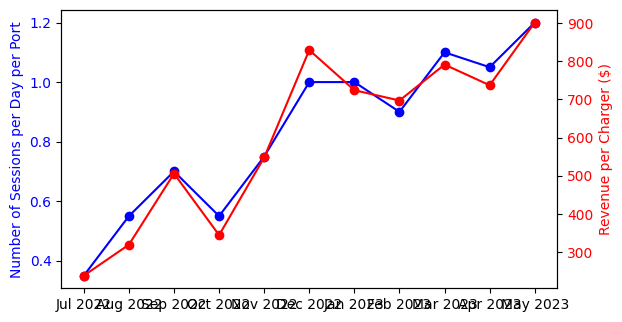

In [ ]:
import matplotlib.pyplot as plt

# Data for number of sessions per day per charger and revenue per charger
months = ['Jul 2022', 'Aug 2022', 'Sep 2022', 'Oct 2022', 'Nov 2022', 'Dec 2022', 'Jan 2023', 'Feb 2023', 'Mar 2023', 'Apr 2023', 'May 2023']
sessions_per_day_per_port = [0.7/2, 1.1/2, 1.4/2, 1.1/2, 1.5/2, 2.0/2, 2.0/2, 1.8/2, 2.2/2, 2.1/2, 2.4/2]
average_session_time = [40, 32, 43, 36, 41, 48, 41, 44, 123, 40, 41]
revenue_per_charger = [239, 320, 506, 345, 548, 829, 724, 697, 791, 737, 901]

# Creating the line chart
fig, ax1 = plt.subplots()

# Plotting number of sessions per day per charger on the primary axis
ax1.plot(months, sessions_per_day_per_port, marker='o', color='blue')
ax1.set_ylabel('Number of Sessions per Day per Port', color='blue')
ax1.tick_params(axis='y', labelcolor='blue')

# Creating a secondary y-axis for revenue per charger
ax2 = ax1.twinx()
ax2.plot(months, revenue_per_charger, marker='o', color='red')
ax2.set_ylabel('Revenue per Charger ($)', color='red')
ax2.tick_params(axis='y', labelcolor='red')

# Adjusting the layout and spacing
plt.subplots_adjust(bottom=0.3)
plt.show()

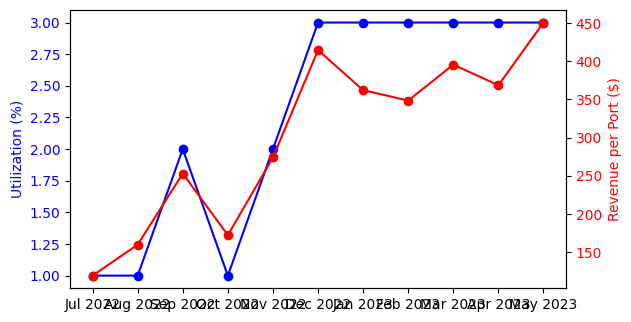

In [ ]:
import matplotlib.pyplot as plt
import numpy as np

# Data for number of sessions per day per charger and revenue per charger
months = ['Jul 2022', 'Aug 2022', 'Sep 2022', 'Oct 2022', 'Nov 2022', 'Dec 2022', 'Jan 2023', 'Feb 2023', 'Mar 2023', 'Apr 2023', 'May 2023']
number_ports_per_charger = 2
sessions_per_day_per_charger = np.array([0.7, 1.1, 1.4, 1.1, 1.5, 2.0, 2.0, 1.8, 2.2, 2.1, 2.4])
average_session_time = np.array([40, 32, 43, 36, 41, 44, 41, 44, 41, 40, 41])
revenue_per_charger = [239, 320, 506, 345, 548, 829, 724, 697, 791, 737, 901]
sessions_per_day_per_port = sessions_per_day_per_charger / number_ports_per_charger
revenue_per_port = np.array(revenue_per_charger) / number_ports_per_charger

# Calculating the utilization based on the formula and rounding to the nearest percent
utilization = np.round(sessions_per_day_per_port * average_session_time / 1440 * 100)

# Creating the line chart
fig, ax1 = plt.subplots()

# Plotting utilization on the primary axis
ax1.plot(months, utilization, marker='o', color='blue')
ax1.set_ylabel('Utilization (%)', color='blue')
ax1.tick_params(axis='y', labelcolor='blue')

# Creating a secondary y-axis for revenue per charger
ax2 = ax1.twinx()
ax2.plot(months, revenue_per_port, marker='o', color='red')  # Corrected variable name
ax2.set_ylabel('Revenue per Port ($)', color='red')  # Adjusted label
ax2.tick_params(axis='y', labelcolor='red')

# Adjusting the layout and spacing
plt.subplots_adjust(bottom=0.3)
plt.show()

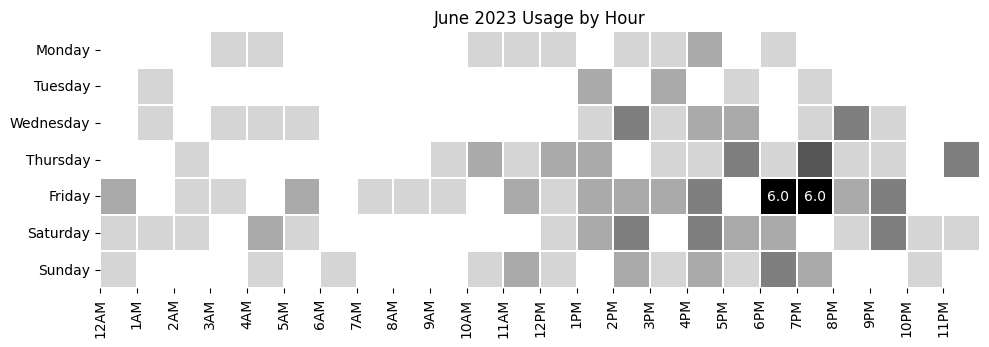

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Load the data from Excel file
data = pd.read_excel('raw.xlsx')

# Preprocess the data if needed
# Ensure 'Day' column contains the day of the week and 'Time' column contains time information

# Filter out any rows with 'Time' equal to 1900-01-01 00:00:00
data = data[data['Time'] != pd.Timestamp('1900-01-01 00:00:00')]

# Convert 'Day' column to categorical data for proper ordering
data['Day'] = pd.Categorical(
    data['Day'], categories=['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday'], ordered=True
)

# Convert 'Time' column to string representation and extract the hour information
data['Time'] = data['Time'].apply(lambda x: str(x)[:2])

# Create a pivot table with 'Time' as x-axis and 'Day' as y-axis
pivot_table = data.pivot_table(index='Day', columns='Time', aggfunc='size')

# Determine the highest count value
max_count = pivot_table.max().max()

# Create the heatmap plot
plt.figure(figsize=(10, 6))

# Create heatmap with only the highest count annotated
annot = pivot_table.where(pivot_table == max_count).replace(float('nan'), '')

ax_heatmap = sns.heatmap(pivot_table, cmap='binary', cbar=False, square=True, linewidths=0.3,
                         annot=annot, fmt='',
                         annot_kws={'fontsize': 10},
                         cbar_kws={'orientation': 'horizontal', 'ticks': [0, 1, 2, 3, 4, 5, max_count]})

# Remove x-axis and y-axis titles
ax_heatmap.set_xlabel('')
ax_heatmap.set_ylabel('')

# Customize x-axis ticks and labels
x_ticks = range(24)
x_labels = [f'{i}AM' if i < 12 else f'{i - 12}PM' for i in x_ticks]
x_labels[0] = '12AM'  # Set the first label as '12AM'
x_labels[12] = '12PM'  # Set the label for 12PM
ax_heatmap.set_xticks(x_ticks)
ax_heatmap.set_xticklabels(x_labels, rotation=90)

# Customize y-axis ticks and labels
y_ticks = range(len(pivot_table.index))
y_labels = pivot_table.index
ax_heatmap.set_yticks([tick + 0.5 for tick in y_ticks])
ax_heatmap.set_yticklabels(y_labels, rotation=0, ha='right')

# Remove the grid pattern
ax_heatmap.grid(False)

plt.tight_layout()
plt.title('June 2023 Usage by Hour')
plt.show()